## Statistical Analysis and Plots

In [1]:
# Import libraries to be used in the task
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy import stats

# Ignore warnings - warning were used in the development of the notebook, and removed in the final version
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset to be analysed
unfinished_construction_population_df = pd.read_csv('unfinished_construction_population_df.csv')
unfinished_construction_population_df.info()
unfinished_construction_population_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Department Ref Number        420 non-null    int64 
 1   Construction Activity (Y/N)  420 non-null    object
 2   County                       420 non-null    object
 3   Detached Units               420 non-null    int64 
 4   Semi-detached Units          420 non-null    int64 
 5   Terraced Units               420 non-null    int64 
 6   Apartment Units              420 non-null    int64 
 7   Duplex Units                 420 non-null    int64 
 8   Total All Units              420 non-null    int64 
 9   Occupied Houses              420 non-null    int64 
 10  Vacant Houses                420 non-null    int64 
 11  No Start Houses              420 non-null    int64 
 12  Occupied Apartments          420 non-null    int64 
 13  Vacant Apartments            420 no

(420, 17)

In [3]:
unfinished_construction_population_df.head()

,Department Ref Number,Construction Activity (Y/N),County,Detached Units,Semi-detached Units,Terraced Units,Apartment Units,Duplex Units,Total All Units,Occupied Houses,Vacant Houses,No Start Houses,Occupied Apartments,Vacant Apartments,No Start Apartments,Building Site Only,County Population
0,71,No,Carlow,58,0,0,0,0,58,10,2,0,0,0,0,No,56900
1,74,No,Carlow,10,32,18,0,0,60,31,1,0,0,0,0,No,56900
2,79,No,Carlow,11,24,20,8,4,67,54,0,0,6,0,0,No,56900
3,82,No,Carlow,0,8,0,0,0,8,6,0,0,0,0,0,No,56900
4,83,No,Carlow,31,26,0,0,0,57,19,1,0,0,0,0,No,56900


In [4]:
# Create a pairplot for an initial visualisation of the data

#sns.pairplot(unfinished_construction_population_df)

In [5]:
# Descriptive statistics of the dataset

unfinished_construction_population_df.describe()

,Department Ref Number,Detached Units,Semi-detached Units,Terraced Units,Apartment Units,Duplex Units,Total All Units,Occupied Houses,Vacant Houses,No Start Houses,Occupied Apartments,Vacant Apartments,No Start Apartments,County Population
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,4.200000e+02
mean,1554.235714,11.707143,24.190476,11.716667,9.873810,1.666667,59.154762,17.207143,1.995238,0.128571,3.650000,0.585714,0.038095,2.238195e+05
std,919.535765,22.062018,36.752697,23.379370,51.881688,10.025187,81.434117,27.356350,5.549085,1.509759,28.561601,4.449106,0.780720,2.667421e+05
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.200000e+04
25%,689.750000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.620000e+04
50%,1569.000000,5.000000,10.000000,0.000000,0.000000,0.000000,35.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.477000e+05
75%,2342.750000,14.000000,32.000000,14.000000,0.000000,0.000000,70.000000,22.250000,2.000000,0.000000,0.000000,0.000000,0.000000,1.949000e+05
max,3126.000000,331.000000,246.000000,142.000000,899.000000,142.000000,899.000000,163.000000,69.000000,23.000000,419.000000,73.000000,16.000000,1.347400e+06


In [6]:
# Descriptive statistics regarding the size of each unfinished development

mean_total_units = unfinished_construction_population_df["Total All Units"].mean()
print(f"Mean = {mean_total_units}")

median_total_units = unfinished_construction_population_df["Total All Units"].median()
print(f"Median = {median_total_units}")

standard_deviation_total_units = unfinished_construction_population_df["Total All Units"].std()
print(f"Standard Deviation = {standard_deviation_total_units}")

Mean = 59.154761904761905
Median = 35.0
Standard Deviation = 81.43411675130325


## Visualisations of county breakdown

Unfinished developments in each county:
Cork         59
Kerry        31
Tipperary    30
Roscommon    28
Donegal      28
Leitrim      21
Cavan        21
Galway       18
Carlow       17
Wexford      15
Dublin       15
Kilkenny     15
Limerick     14
Sligo        12
Longford     11
Laois        11
Louth        10
Kildare      10
Clare        10
Wicklow       9
Mayo          8
Waterford     8
Offaly        7
Monaghan      6
Westmeath     4
Meath         2
Name: County, dtype: int64


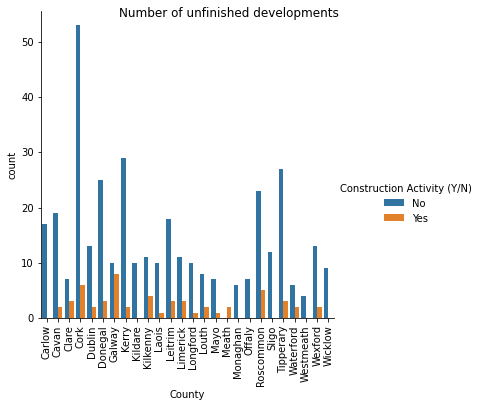

In [7]:
# Create a bar chart to visualise the number of unfinished developments across the country by county

sites_per_county_plot = sns.catplot(x = "County", data=unfinished_construction_population_df, kind= "count", hue = "Construction Activity (Y/N)")
sites_per_county_plot.ax.set_xticklabels(sites_per_county_plot.ax.get_xticklabels(), rotation = 90)   

sites_per_county_plot.fig.suptitle("Number of unfinished developments")

# Display the number of sites in each county with the graph

sites_per_county = unfinished_construction_population_df['County'].value_counts()
print(f'Unfinished developments in each county:\n{sites_per_county}')

plt.savefig("sites_per_county.jpg", dpi=300, transparent = True, bbox_inches = 'tight', pad_inches=0.3)

In [8]:
# Analyse the total number of unfinished units per county

# Group the construction developments by county. The population column is dropped temporarily so that the
# population values are not summed together
unfinished_units_df = unfinished_construction_population_df.drop('County Population', axis=1).groupby('County').sum()

# Prepare the population values per county to be added to the new dataframe
county_ = unfinished_construction_population_df['County']
population_ = unfinished_construction_population_df['County Population']
county_population = pd.concat([county_, population_], axis=1)
county_population_drop = county_population.drop_duplicates()

# Merge the new dataframe with the population data
unfinished_units_county_df = pd.merge(unfinished_units_df, county_population_drop, how = 'left', on = 'County')

unfinished_units_county_df.to_csv('unfinished_units_county_df.csv', index = 'False')

unfinished_units_county_df.head(5)

,County,Department Ref Number,Detached Units,Semi-detached Units,Terraced Units,Apartment Units,Duplex Units,Total All Units,Occupied Houses,Vacant Houses,No Start Houses,Occupied Apartments,Vacant Apartments,No Start Apartments,County Population
0,Carlow,1649,260,472,196,20,4,952,331,13,0,17,1,0,56900
1,Cavan,7567,302,318,173,136,0,929,308,37,0,14,3,0,76200
2,Clare,5025,106,248,180,25,1,560,251,6,0,20,6,0,118800
3,Cork,62885,772,1824,1319,339,18,4272,1518,125,0,24,4,0,542900
4,Donegal,24941,252,642,63,100,8,1065,304,53,3,28,8,0,159200


In [9]:
# Descriptive statistics regarding the size of each unfinished development

mean_total_units = unfinished_units_county_df["Total All Units"].mean()
print(f"Mean = {mean_total_units}")

median_total_units = unfinished_units_county_df["Total All Units"].median()
print(f"Median = {median_total_units}")

standard_deviation_total_units = unfinished_units_county_df["Total All Units"].std()
print(f"Standard Deviation = {standard_deviation_total_units}")

Mean = 955.5769230769231
Median = 730.5
Standard Deviation = 846.8142735252836


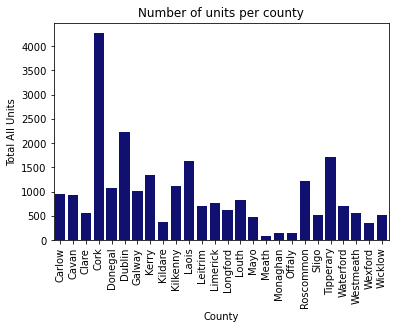

In [10]:
sns.barplot(x = unfinished_units_county_df["County"], y = "Total All Units", data = unfinished_units_county_df, color = 'navy')
plt.xticks(rotation=90)
plt.title('Number of units per county')

plt.savefig("units_per_county.jpg", dpi=300, transparent = True, bbox_inches = 'tight', pad_inches=0.3)

In [11]:
# Analyse the number of units per capita

unfinished_units_county_df["Units per capita"] = unfinished_units_county_df["Total All Units"] / unfinished_units_county_df["County Population"]

unfinished_units_county_df.head(20)

,County,Department Ref Number,Detached Units,Semi-detached Units,Terraced Units,Apartment Units,Duplex Units,Total All Units,Occupied Houses,Vacant Houses,No Start Houses,Occupied Apartments,Vacant Apartments,No Start Apartments,County Population,Units per capita
0,Carlow,1649,260,472,196,20,4,952,331,13,0,17,1,0,56900,0.016731
1,Cavan,7567,302,318,173,136,0,929,308,37,0,14,3,0,76200,0.012192
2,Clare,5025,106,248,180,25,1,560,251,6,0,20,6,0,118800,0.004714
3,Cork,62885,772,1824,1319,339,18,4272,1518,125,0,24,4,0,542900,0.007869
4,Donegal,24941,252,642,63,100,8,1065,304,53,3,28,8,0,159200,0.006690
5,Dublin,13086,52,28,264,1809,86,2239,207,3,0,1051,8,0,1347400,0.001662
6,Galway,23569,139,444,180,224,22,1009,205,49,0,102,36,0,258100,0.003909
7,Kerry,60147,308,710,205,103,8,1334,298,47,10,8,2,0,147700,0.009032
8,Kildare,12189,88,142,117,23,11,381,136,12,0,7,2,0,222500,0.001712
9,Kilkenny,22858,171,588,247,49,62,1117,317,45,0,0,0,0,99200,0.011260


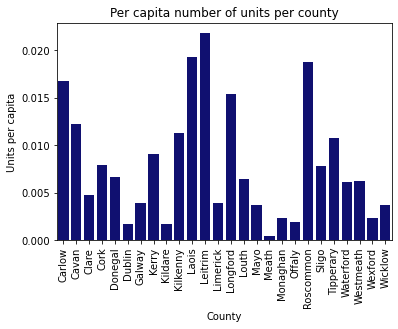

In [12]:
sns.barplot(x = unfinished_units_county_df["County"], y = "Units per capita", data = unfinished_units_county_df, color = 'navy')
plt.xticks(rotation=90)

plt.title('Per capita number of units per county')

plt.savefig("per_capita_units_per_county.jpg", dpi=300, transparent = True, bbox_inches = 'tight', pad_inches=0.3)

## Outliers

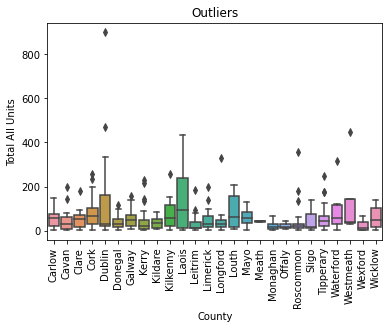

In [13]:
sns.boxplot(x = "County", y ='Total All Units', data=unfinished_construction_population_df)
plt.xticks(rotation=90)

plt.title('Outliers')

plt.savefig("outliers.jpg", dpi=300, transparent = True, bbox_inches = 'tight', pad_inches=0.3)

In [14]:
# Investigate outliers

# Check the row with the maximum "Total All Units" value. The if-elif loop prints the type of development

max_units_row = unfinished_construction_population_df.loc[unfinished_construction_population_df['Total All Units'].idxmax()]

if max_units_row["Total All Units"] == max_units_row["Apartment Units"] + max_units_row["Duplex Units"]:
    print("Largest Development consists of apartments, including duplexes\n\n")
elif max_units_row["Total All Units"] == max_units_row["Detached Units"] + max_units_row["Semi-detached Units"] + max_units_row["Terraced Units"] :
    print("Largest Development consists of houses\n\n")
else:
    print("Largest Development consists of a mixture of houses and apartments\n\n")

print(max_units_row)

Largest Development consists of apartments, including duplexes


Department Ref Number              633
Construction Activity (Y/N)         No
County                          Dublin
Detached Units                       0
Semi-detached Units                  0
Terraced Units                       0
Apartment Units                    899
Duplex Units                         0
Total All Units                    899
Occupied Houses                      0
Vacant Houses                        0
No Start Houses                      0
Occupied Apartments                419
Vacant Apartments                    0
No Start Apartments                  0
Building Site Only                  No
County Population              1347400
Name: 107, dtype: object


In [15]:
# Check the rows with other high "Total All Units" values. 
# 6 values were chosen, representing the 6 highest outliers from the boxplot

max_units_rows = unfinished_construction_population_df.nlargest(6, 'Total All Units')

max_units_rows


,Department Ref Number,Construction Activity (Y/N),County,Detached Units,Semi-detached Units,Terraced Units,Apartment Units,Duplex Units,Total All Units,Occupied Houses,Vacant Houses,No Start Houses,Occupied Apartments,Vacant Apartments,No Start Apartments,Building Site Only,County Population
107,633,No,Dublin,0,0,0,899,0,899,0,0,0,419,0,0,No,1347400
144,1043,No,Dublin,0,0,119,349,0,468,90,1,0,349,0,0,No,1347400
393,2610,No,Westmeath,0,115,0,189,142,446,53,0,0,52,0,0,No,88800
230,1528,No,Laois,66,224,142,0,0,432,163,65,0,0,0,0,No,84700
231,1545,Yes,Laois,120,246,30,14,14,424,101,13,0,0,0,0,No,84700
335,2363,No,Roscommon,52,194,105,4,0,355,0,0,0,0,0,0,Yes,64500


## Binomial Distribution

In [16]:
# Check how many sites have construction in progress

construction_in_progress = (unfinished_construction_population_df['Construction Activity (Y/N)'] == 'Yes').sum()
#construction_in_progress = ((unfinished_construction_population_df['Construction Activity (Y/N)'] == 'Yes') & (unfinished_construction_population_df['County'] == 'Cork')).sum()
total_sites = unfinished_construction_population_df.shape[0]

print(f'Number of building sites = {total_sites}')
print(f'Number of active building sites = {construction_in_progress}')

Number of building sites = 420
Number of active building sites = 55


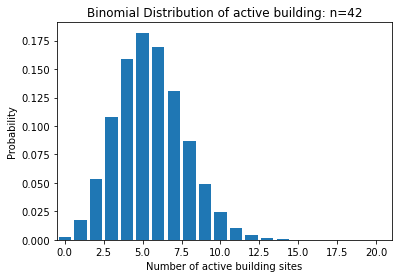

<Figure size 432x288 with 0 Axes>

In [17]:
# Taking the total number of sites in the data, and the number of 
# those which are active, the probabilty of a site being active is:

p = construction_in_progress / total_sites

# For a binomial analysis, a number of sites are randomly selected. 
# The population size should be at least 10 times larger than the sample, so
# with a population of 420, 42 samples were selected

n = 42

binomial_dist = binom(n, p)

x = np.arange(0, n+1)
pmf = binomial_dist.pmf(x)
plt.xlim([-0.5,n/2])
plt.xlabel('Number of active building sites')
plt.ylabel('Probability')
plt.title('Binomial Distribution of active building: n=42')
plt.bar(x, pmf)
plt.show()


plt.savefig("binomial.jpg", dpi=300, transparent = False, bbox_inches = 'tight', pad_inches=0.3)

In [18]:
# Show sample probabilities from the binomial

k=-5
while k < 20:
    probs = binom.pmf(k, n, p)
    k += 5
    print(f'Probability of {k} sites: {probs:.3f}')

          

Probability of 0 sites: 0.000
Probability of 5 sites: 0.003
Probability of 10 sites: 0.182
Probability of 15 sites: 0.024
Probability of 20 sites: 0.000


In [19]:

samples = [1,2,3,4,5,6,7,8,9,10]
for i in samples:
    sample = unfinished_construction_population_df.sample(n=42)
    count_sample = (sample['Construction Activity (Y/N)'] == 'Yes').sum()
    print(f'Number of active sites from sample = {count_sample}')

Number of active sites from sample = 7
Number of active sites from sample = 5
Number of active sites from sample = 9
Number of active sites from sample = 7
Number of active sites from sample = 6
Number of active sites from sample = 7
Number of active sites from sample = 5
Number of active sites from sample = 10
Number of active sites from sample = 5
Number of active sites from sample = 6


## Normal Distribution

In [20]:
occupancy_df = unfinished_construction_population_df[['Total All Units','Occupied Houses','Occupied Apartments', 'Building Site Only']]

occupancy_df['Occupancy'] = (occupancy_df['Occupied Houses'] + occupancy_df['Occupied Apartments']) / occupancy_df['Total All Units']  
occupancy_non_site_only_df = occupancy_df.drop(occupancy_df[occupancy_df['Building Site Only'] == 'Yes'].index)

occupancy_non_site_only_df.describe()

,Total All Units,Occupied Houses,Occupied Apartments,Occupancy
count,290.000000,290.000000,290.000000,290.000000
mean,71.748276,24.820690,4.841379,0.429228
std,88.933913,29.937922,33.481013,0.254090
min,3.000000,0.000000,0.000000,0.000000
25%,21.250000,5.000000,0.000000,0.203571
50%,45.000000,13.000000,0.000000,0.400000
75%,86.750000,32.000000,0.000000,0.600000
max,899.000000,163.000000,419.000000,1.000000


<AxesSubplot:xlabel='Occupancy', ylabel='Count'>

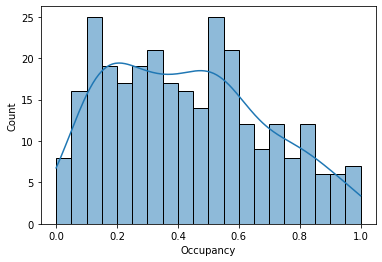

In [21]:
sns.histplot(data = occupancy_non_site_only_df, x = "Occupancy", binwidth = 0.05, kde=True)

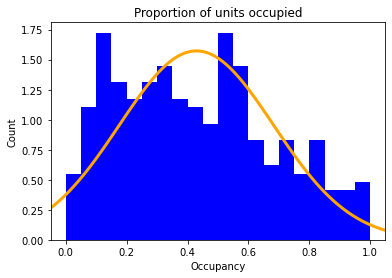

<Figure size 432x288 with 0 Axes>

In [22]:
# sns.histplot(data = occupancy_non_site_only_df, x = "Occupancy", binwidth = 0.05)

norm_data = occupancy_non_site_only_df["Occupancy"]
mean_occupancy, std_occupancy = norm.fit(norm_data)

plt.hist(norm_data, bins = 20, density = True, color = 'blue')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_occupancy, std_occupancy)
  
plt.plot(x, p, 'k', linewidth=3, color = 'orange')
plt.xlim([-0.05,1.05])
plt.xlabel('Occupancy')
plt.ylabel('Count')
plt.title('Proportion of units occupied')
plt.show()


plt.savefig("normal.jpg", dpi=300, transparent = False, bbox_inches = 'tight', pad_inches=0.3)
  
